In [5]:
import pandas as pd

soak = pd.read_csv('Mpro/extra_files/Mpro_soaks.csv')

In [13]:
soak['Mounting Result'].unique()

array(['OK: No comment:No comment', 'OK: Clear:Normal',
       'OK: Phase Separation:Normal', 'OK: Precipitated:Normal',
       'OK: Clear:Cracked', 'OK: Crystalline:Normal',
       'OK: Precipitated:Cracked', 'OK: No comment:Cracked',
       'OK: Crystalline:No comment', 'OK: Precipitated:No comment',
       'OK: Precipitated:Melted', 'OK: Crystalline:Melted',
       'OK: Clear:No comment', 'OK: Phase Separation:No comment',
       'OK: Phase Separation:Cracked', 'OK: Precipitated:Jelly',
       'Mounted_Clear', 'OK: Crystalline:Cracked',
       'FAIL: No comment:Melted', 'OK: No comment:Normal',
       'OK: Bad Dispense:No comment', nan, 'FAIL: No comment:No comment',
       'FAIL: Crystalline:Melted', 'FAIL: Precipitated:No comment',
       'FAIL: No comment:Cracked', 'FAIL: Precipitated:Melted',
       'FAIL: Precipitated:Cracked', 'OK: Clear:Melted',
       'OK: No comment:Melted', 'FAIL: Crystalline:Cracked',
       'FAIL: Clear:Cracked', 'FAIL: Phase Separation:Cracked',
       

In [10]:
soak['Data Collection Outcome'].unique()

array(['success', 'None', 'Failed - low resolution', nan,
       'Failed - unknown', 'Failed - processing'], dtype=object)

In [11]:
soak['Refinement Outcome'].unique()

array(['6 - Deposited', '5 - Deposition ready', '7 - Analysed & Rejected',
       '3 - In Refinement', '4 - CompChem ready', '1 - Analysis Pending',
       '2 - PANDDA model', nan], dtype=object)

In [12]:
soak['Status'].unique()

array(['Completed', 'Stopped', 'In progress', nan], dtype=object)

In [30]:
pd.pivot_table(soak, index='Data Collection Outcome', columns='Refinement Outcome', values='Compound ID', aggfunc=len)

Refinement Outcome,1 - Analysis Pending,2 - PANDDA model,3 - In Refinement,4 - CompChem ready,5 - Deposition ready,6 - Deposited,7 - Analysed & Rejected
Data Collection Outcome,,,,,,,
Failed - low resolution,NaN,NaN,NaN,NaN,NaN,NaN,130.0
Failed - processing,NaN,NaN,NaN,NaN,NaN,NaN,1.0
None,NaN,NaN,2.0,NaN,NaN,NaN,211.0
success,654.0,4.0,321.0,8.0,456.0,91.0,6385.0


In [29]:
pd.pivot_table(soak, index='Data Collection Outcome', columns='Mounting Result', values='Compound ID', aggfunc=len)

Mounting Result,FAIL: Bad Dispense:No comment,FAIL: Clear:Cracked,FAIL: Clear:Melted,FAIL: Crystalline:Cracked,FAIL: Crystalline:Melted,FAIL: Crystalline:No comment,FAIL: No comment:Cracked,FAIL: No comment:Melted,FAIL: No comment:No comment,FAIL: Phase Separation:Cracked,...,OK: No comment:Normal,OK: Phase Separation:Cracked,OK: Phase Separation:No comment,OK: Phase Separation:Normal,OK: Precipitated:Coloured,OK: Precipitated:Cracked,OK: Precipitated:Jelly,OK: Precipitated:Melted,OK: Precipitated:No comment,OK: Precipitated:Normal
Data Collection Outcome,,,,,,,,,,,,,,,,,,,,,
Failed - low resolution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,11.0,4.0
Failed - processing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Failed - unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
None,1.0,16.0,21.0,6.0,14.0,1.0,69.0,78.0,57.0,1.0,...,NaN,1.0,3.0,3.0,1.0,14.0,1.0,4.0,46.0,17.0
success,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,5.0,5.0,39.0,16.0,3.0,140.0,12.0,15.0,399.0,229.0


In [256]:
def parse_outcome(row):
    soaked = str(row['Soak DB Comments']).strip()
    mounting = str(row['Mounting Result'])
    trimmed = mounting.replace('FAIL: ', '').replace('OK: ', '').replace('Fail_', '')\
                      .replace('No comment', '').replace('Normal', '')\
                      .replace('::', '').replace(': :', '').strip(':').strip()
    trimmed = trimmed if (len(trimmed) != 0) and trimmed not in ('None', 'nan', '') else 'unknown'
    collection = str(row['Data Collection Outcome']).replace('Failed -','').strip()
    refinement = str(row['Refinement Outcome'])
    confidence = str(row['Ligand Confidence'])[4:]
    in_fraggers = str(row['Sample Name']) not in ('None', 'nan', '')
    if 'weak density' in confidence.lower():
        return 'weak-density'
    if collection == 'success' and in_fraggers:
        return 'success'
    elif collection == 'success' and not in_fraggers:
        return 'no density'
    if 'mistake used' in soaked or 'plate dropped' in soaked and 'low resolution' in collection:
        return 'machine/human error'
    if 'Bad Dispense' in mounting or 'SOAKDB Issue' in soaked or 'Unpickable' in mounting:
        return 'machine/human error'
    for k in ('Melted', 'Cracked', 'Jelly', 'Precipitated', 'Coloured', 'Phase Separation'):
        if k in mounting:
            return 'chemical issue'
    if confidence:
        return confidence
    return 'unknown issue'
    
soak['experimental_outcome'] = soak.apply(parse_outcome, axis=1)
soak['experimental_outcome'].value_counts()

success                7859
unknown issue           828
chemical issue          450
weak-density            134
machine/human error      41
no density                1
Name: experimental_outcome, dtype: int64

In [245]:
import numpy as np

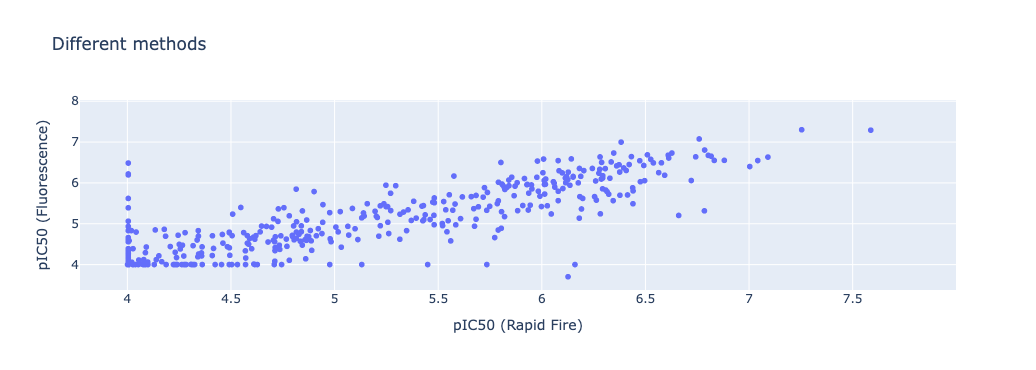

In [246]:
soak['pIC50 (Rapid Fire)'] = (soak['Rapid Fire avg IC50 (uM)']  / 1e6 ).apply(np.log10) * -1
soak['pIC50 (Fluorescence)'] = (soak['Fluorescence avg IC50 (uM)']  / 1e6 ).apply(np.log10) * -1

import plotly.express as px

px.scatter(soak.drop_duplicates('Compound ID', keep='last'), 'pIC50 (Rapid Fire)', 'pIC50 (Fluorescence)',
          title='Different methods')

In [247]:
# geomean
soak['pIC50'] = (soak[['Rapid Fire avg IC50 (uM)',
                       'Fluorescence avg IC50 (uM)'
                      ]].mean(axis=1) / 1e6 ).apply(np.log10) * -1

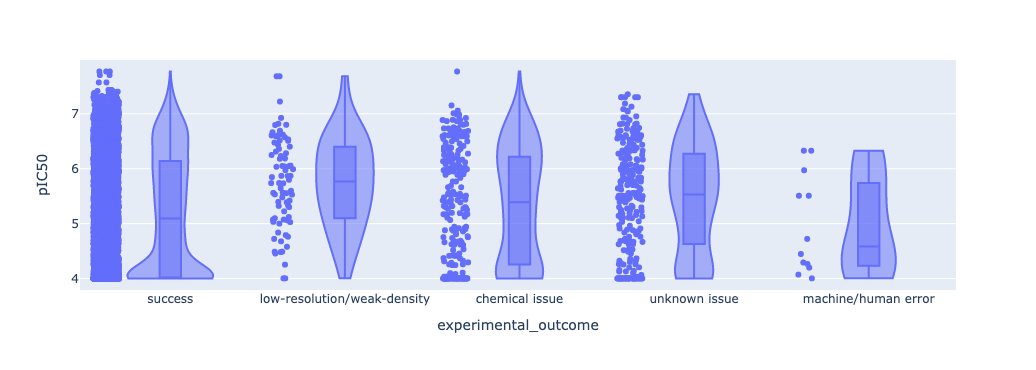

In [248]:
import plotly.express as px

fig = px.violin(soak, x='experimental_outcome', y='pIC50', box=True, points='all')
fig.update_traces(spanmode = 'hard')
fig

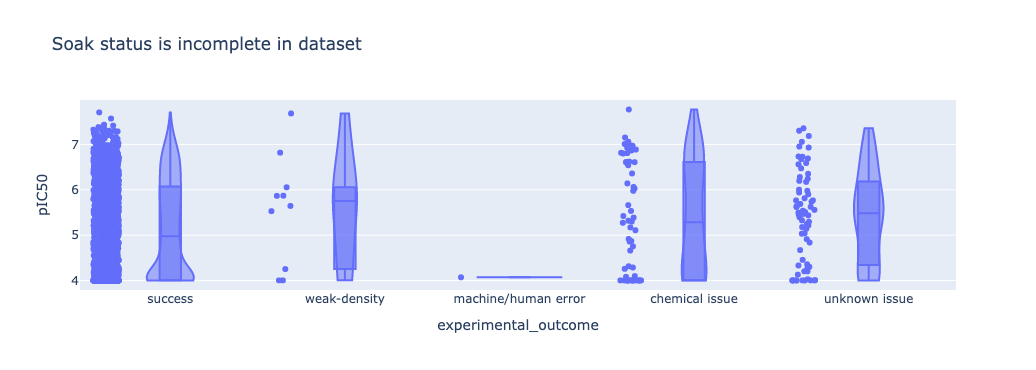

In [262]:
import plotly.express as px

fig = px.violin(soak.drop_duplicates('Compound ID', keep='last'), 
                x='experimental_outcome', y='pIC50', box=True, points='all',
               title='Soak status is incomplete in dataset',
               )
fig.update_traces(spanmode = 'hard')

#fig.write_image("images/incomplete_soak.jpg")
fig

In [ ]:
soak['in_fragalysis'] = soak['Sample Name'].apply(lambda v: str(v) not in ('None', 'nan', '') )
pd.pivot_table(soak.drop_duplicates('Compound ID', keep='last'), index='experimental_outcome', columns='in_fragalysis', values='Compound ID', aggfunc=len)

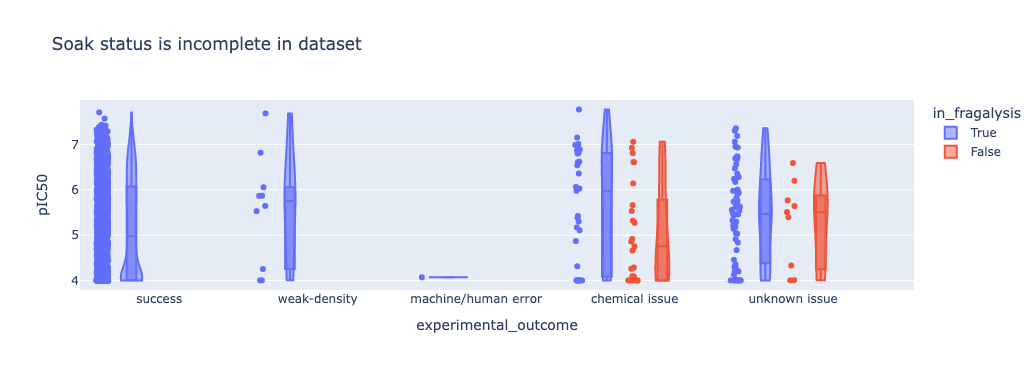

In [269]:
import plotly.express as px

fig = px.violin(soak.drop_duplicates('Compound ID', keep='last'), 
                x='experimental_outcome', y='pIC50', box=True, points='all',
                color='in_fragalysis',
               title='Soak status is incomplete in dataset',
               )
fig.update_traces(spanmode = 'hard')
fig.write_image("images/incomplete_soak.jpg")
fig

In [250]:
soak['site_name'] = soak['Compound ID'].map(moonshot['site_name'].to_dict()).fillna('')

In [257]:
def is_active(name):
    if name == '':
        return 'Unknown'
    if name in ('Moonshot - allosteric', 
                        'XChem Screen - xtal contact',
                        'XChem screen - surface', 'XChem screen - dimer interface'):
        return 'Other'
    return 'Active site'

soak['active_site'] = soak['site_name'].apply(is_active)

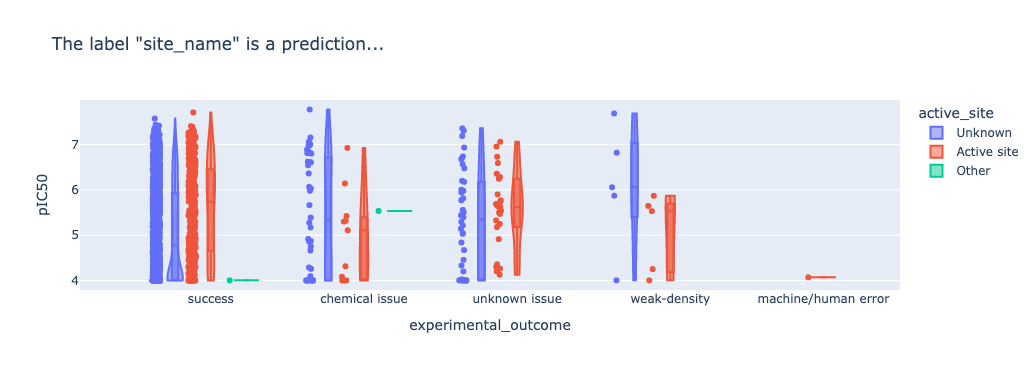

In [258]:
import plotly.express as px

fig = px.violin(soak.drop_duplicates('Compound ID', keep='last'), x='experimental_outcome', y='pIC50', 
                color='active_site',
                box=True, points='all',
                title='The label "site_name" is a prediction...',
               )
fig.update_traces(spanmode = 'hard')
fig

in_fragalysis,False,True
experimental_outcome,,
chemical issue,82.0,73.0
machine/human error,3.0,2.0
success,NaN,4029.0
unknown issue,16.0,301.0
weak-density,NaN,36.0


In [ ]:
## Moonshot

Assumption all compounds were soaked.

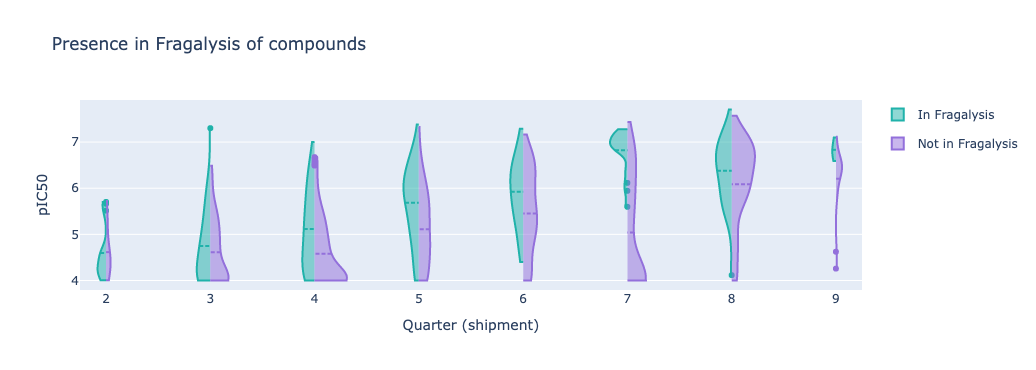

In [287]:
moonshot['quarter (shipment)'] = moonshot.shipment_date.apply(lambda d: 1+int(d.month // 3 + 4 * (d.year -2020)) if str(d.month) != 'nan' else -1)

import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure()

fig.add_trace(go.Violin(x=moonshot.loc[moonshot.in_fragalysis]['quarter (shipment)'],
                        y=moonshot.loc[moonshot.in_fragalysis]['pIC50'],
                        legendgroup='Yes', scalegroup='Yes', name='In Fragalysis',
                        side='negative',
                        line_color='lightseagreen')
             )
fig.add_trace(go.Violin(x=moonshot.loc[~moonshot.in_fragalysis]['quarter (shipment)'],
                        y=moonshot.loc[~moonshot.in_fragalysis]['pIC50'],
                        legendgroup='No', scalegroup='No', name='Not in Fragalysis',
                        side='positive',
                        line_color='mediumpurple')
             )
fig.update_traces(meanline_visible=True,
                 # points='all',  
                 # jitter=0.05, 
                  scalemode='count'
                 )
fig.update_layout(violingap=0, violingroupgap=0, violinmode='overlay',
                  title='Presence in Fragalysis of compounds',
                  xaxis=dict(title='Quarter (shipment)'),
                  yaxis=dict(title='pIC50'),)
fig.update_traces(spanmode = 'hard')
fig.write_image("images/incomplete_soak2.jpg")
fig

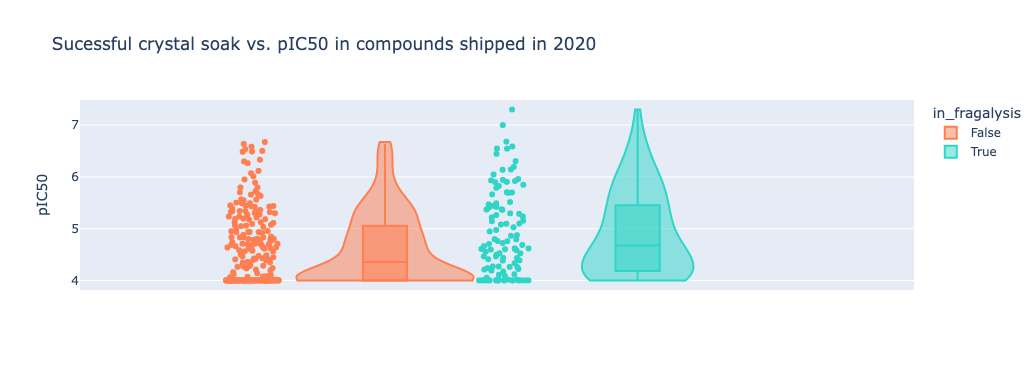

In [298]:
import plotly.express as px

fig = px.violin(moonshot.loc[moonshot['quarter (shipment)'] < 5], 
                #x='experimental_outcome', 
                y='pIC50', 
                color='in_fragalysis',
                color_discrete_map = {True: '#30d5c8', False:'#ff7f50'},
                box=True, points='all',
                title='Sucessful crystal soak vs. pIC50 in compounds shipped in 2020',
               )
fig.update_traces(spanmode = 'hard')
fig.write_image("images/soak-pIC50.jpg")
fig